In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Configure seaborn for consistent plots
sns.set(style='ticks', font_scale=1.75)

# Define function to calculate daily averages over a specified window size
def dailyAvg(data, windowsize):
    data = np.array(data)
    data = data[:windowsize * (len(data) // windowsize)]  # Trim to exact window size
    return np.nanmean(data.reshape(-1, windowsize), axis=1)

# Define function to calculate Vapor Pressure Deficit (VPD)
def calVPD(T, RH):  # T in degrees Celsius, RH as decimal (0-1)
    es = 0.6108 * np.exp(17.27 * T / (T + 237.3))  # Saturated vapor pressure in kPa
    vpd = es * (1 - RH)  # VPD in kPa
    return vpd

# Path to input data
inpath = r'C:\Users\dbryant\Data\\'  # Adjusted file path for Windows
file_name = 'US-MMS_short.csv'
file_path = inpath + file_name

# Load dataset
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    raise FileNotFoundError(f"File not found at path: {file_path}")

# Generate monthly time stamps from YEAR, MONTH, and DAY columns
tt_month = [
    datetime(
        int(df['YEAR'].iloc[i * 24 * 30]),
        int(df['MONTH'].iloc[i * 24 * 30]),
        int(df['DAY'].iloc[i * 24 * 30])
    )
    for i in range(len(df) // (24 * 30))
]

# Calculate monthly averages for selected variables
mNEE = -dailyAvg(df['NEE'], 24 * 30)  # Negated for specific context
mT = dailyAvg(df['TA'], 24 * 30)
mRN = dailyAvg(df['SW_NET'], 24 * 30)
mLAI = dailyAvg(df['LAI'], 24 * 30)
mLE = dailyAvg(df['LE'], 24 * 30)
mRH = dailyAvg(df['RH'], 24 * 30)
mSWC = dailyAvg(df['SWC'], 24 * 30)

# Add a VPD column to the dataframe
df['VPD'] = calVPD(df['TA'], df['RH'])

# Calculate monthly average of VPD
mVPD = dailyAvg(df['VPD'], 24 * 30)

# Confirm variables
print("Monthly average variables calculated.")


Dataset loaded successfully.
Monthly average variables calculated.


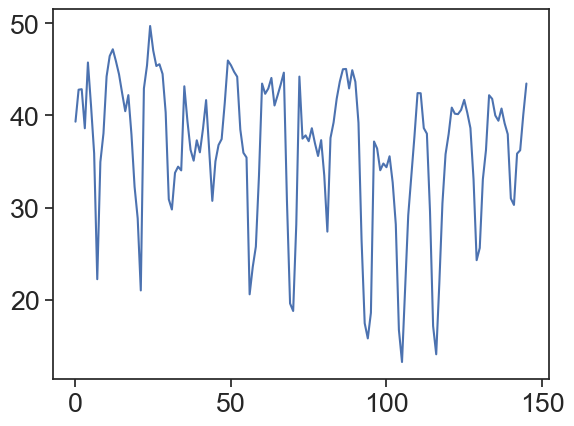

In [2]:
# 1. Plot out three time series of your choice
plt.figure()
plt.plot(mSWC)



(146, 7)
[-5.15569322e-16  3.65004830e-16  1.37333067e-15 -1.16345290e-16
  1.19843253e-15 -8.47115376e-16 -6.02257970e-16] [1. 1. 1. 1. 1. 1. 1.]


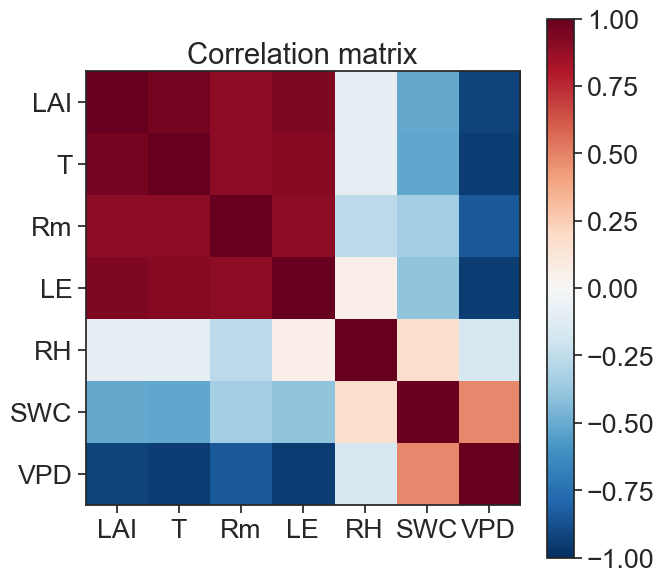

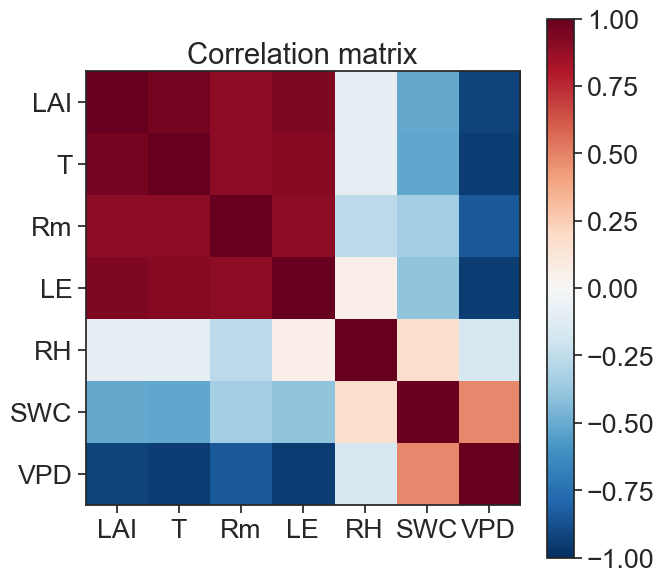

In [3]:
# Exercise 1: Examine colinearity
X = np.column_stack([mLAI,mT,mRN,mLE,mRH,mSWC,mVPD])
varlist = np.array(['LAI','T','Rn','LE','RH','SWC','VPD'])
print(X.shape)

# 2. Manually calculate the correlation matrix of X
# First normalize X by substracting the mean and deviding by the standard deviation

X_normalized = (X-np.mean(X,axis=0))/np.std(X,axis=0)
print(np.mean(X_normalized,axis=0),np.std(X_normalized,axis=0))

# Then calculate the covariance matrix of the normalized X using matrix multiplication, 
# which is identical to the correlation matrix

S = np.dot(np.transpose(X_normalized),X_normalized)/X_normalized.shape[0]
# print(S)

# 3. Visualize the covariance matrix by calling the following function
# Check the covariance
def plot_corr_matrix(S,varlist):
    plt.figure(figsize=(7,7))
    plt.imshow(S,cmap='RdBu_r',vmin=-1,vmax=1)
    plt.xticks(np.arange(X.shape[1]),varlist)
    plt.yticks(np.arange(X.shape[1]),varlist)
    plt.colorbar()
    plt.title('Correlation matrix')

    
    

# 4. Use the numpy function Use numpy function np.corrcoef() to calculate correlation matrix and visualize
varlist = ['LAI','T','Rm','LE','RH','SWC','VPD']
plot_corr_matrix(S,varlist)



# Use the built-in function to calculate the correlation matrix
S = np.corrcoef(np.transpose(X_normalized))
plot_corr_matrix(S,varlist)



[[ True  True  True  True False False  True]
 [ True  True  True  True False False  True]
 [ True  True  True  True False False  True]
 [ True  True  True  True False False  True]
 [False False False False  True False False]
 [False False False False False  True False]
 [ True  True  True  True False False  True]]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 5 6 6 6 6 6] [0 1 2 3 6 0 1 2 3 6 0 1 2 3 6 0 1 2 3 6 4 5 0 1 2 3 6]
LAI T 0.9555623206605625
LAI Rm 0.8982223200620416
LAI LE 0.9342103866502619
LAI VPD -0.9261134631207761
T LAI 0.9555623206605625
T Rm 0.895737185476167
T LE 0.9086177465655888
T VPD -0.948716302880472
Rm LAI 0.8982223200620416
Rm T 0.8957371854761669
Rm LE 0.8947042106886445
Rm VPD -0.8396784064378063
LE LAI 0.9342103866502619
LE T 0.9086177465655888
LE Rm 0.8947042106886445
LE VPD -0.9512613122633605
VPD LAI -0.9261134631207761
VPD T -0.948716302880472
VPD Rm -0.8396784064378064
VPD LE -0.9512613122633606


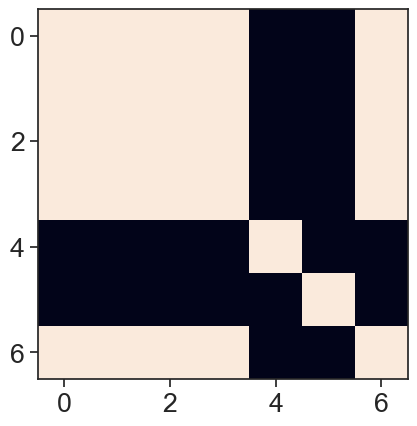

In [4]:
# 5. Print out pairs where the correlation is greater than 0.75. You may want to use np.where()

r,c = np.where(np.abs(S)>0.75)

print(np.abs(S)>0.75)
plt.imshow(np.abs(S)>0.75)
print(r,c)

for i in range(0,len(r)):
    if r[i] != c[i]:
        print(varlist[r[i]],varlist[c[i]],S[r[i],c[i]])

In [5]:
# Exercise 2: Variable selection using variance inflation factor

# 6. Calculate variance inflation factor for the first column (j=0)
p = X.shape[1]
j = 0

y = X[:,0]
x = sm.add_constant(X[:,1:])
m1 = sm.OLS(y,x).fit()
r2 = m1.rsquared
VIF = 1/(1-r2)


# 7. Use a for loop to calculate VIF for all columns

VIF = np.zeros([p,])
for j in range(p):
    y = X[:,j]
    j_ = [jj for jj in range(p) if jj!=j]
    x = sm.add_constant(X[:,j_])
    m1 = sm.OLS(y,x).fit()
    r2 = m1.rsquared
    VIF[j] = 1/(1-r2)

print(VIF)


[18.18615553 39.53968471 14.4048763  23.69650712  5.35300132  2.07061707
 59.54547973]


In [6]:
# 8. Wrap step 7 using a function, which calculates VIF for all columns of X. 
#    Then call the function and check the result.

def cal_VIF(X):
    p = X.shape[1]
    VIF = np.zeros([p,])
    for j in range(p):
        y = X[:,j]
        j_ = [jj for jj in range(p) if jj!=j]
        x = sm.add_constant(X[:,j_])
        m1 = sm.OLS(y,x).fit()
        r2 = m1.rsquared
        VIF[j] = 1/(1-r2)
    return VIF

VIF = cal_VIF(X)
print(VIF)


[18.18615553 39.53968471 14.4048763  23.69650712  5.35300132  2.07061707
 59.54547973]


In [7]:
# 9. Find out the maximumn value and its location of VIF. 
#    For the location/index of of the maximum VIF, consider using np.where() or np.argmax()
# idx = np.where(VIF==max(VIF))[0][0]

idx = np.argmax(VIF)

# Create a boolean variable, judging withther the maximum VIF is greater than 10 (true or false)
collinearity = (VIF[idx]>10)

# 10. Create the updated X and varlist, which exclude the variable with the highest VIF if greater than 10
if collinearity:
    remaining_j = [jj for jj in range(X.shape[1]) if jj!=idx]
    X_updated = X[:,remaining_j]
    
print(X_updated.shape)



(146, 6)


In [8]:
# 11. Wrap steps 8-10 in a function to update X and varlist by finding out the maximum VIF
#     and if exceeding 10, remove the corresponding variable in X and varlist. 

varlist = np.array(varlist)

def remove_maxVIF(X, varlist, trd=10):
    VIF = cal_VIF(X)
    maxvif, idx = max(VIF), np.argmax(VIF)
    print(maxvif,idx)
    if maxvif>trd:
        # option 1
        remaining_j = [jj for jj in range(X.shape[1]) if jj!=idx]
        print(remaining_j)
        X_updated = X[:,remaining_j]
        varlist_updated = varlist[remaining_j]
        
#         # option 2: 
#         X_updated = np.delete(X,idx,axis=1)
#         varlist_updated = np.delete(varlist,idx,axis=0)

    else:
        X_updated = X.copy()
        varlist_updated = varlist.copy()
        print('All VIFs < 10.')

    return X_updated, varlist_updated, VIF 


# Call the function once and check the results
X_updated, varlist_updated, VIF = remove_maxVIF(X,varlist)
print(varlist_updated)
print(VIF)



59.54547972520883 6
[0, 1, 2, 3, 4, 5]
['LAI' 'T' 'Rm' 'LE' 'RH' 'SWC']
[18.18615553 39.53968471 14.4048763  23.69650712  5.35300132  2.07061707
 59.54547973]


In [9]:
X0 = X.copy()
varlist0 = varlist.copy()

# 12. Use a for loop to repeatedly remove variables with the maximum variance inflation factor,
#     one at a time, until all values are below 10. Print out the final list
p = X0.shape[1]
VIF = cal_VIF(X0)
print(varlist0)
for i in range(p):
    if max(VIF)>10:
        X0, varlist0, VIF = remove_maxVIF(X0,varlist0)
        print(varlist0)


['LAI' 'T' 'Rm' 'LE' 'RH' 'SWC' 'VPD']
59.54547972520883 6
[0, 1, 2, 3, 4, 5]
['LAI' 'T' 'Rm' 'LE' 'RH' 'SWC']
17.607084311136393 0
[1, 2, 3, 4, 5]
['T' 'Rm' 'LE' 'RH' 'SWC']
14.155677528352498 1
[0, 2, 3, 4]
['T' 'LE' 'RH' 'SWC']
7.697453006250399 0
All VIFs < 10.
['T' 'LE' 'RH' 'SWC']


In [10]:
# 13. Build a multivariate linear regression model using the variables selected based on VIF
y = mNEE.copy()
X4 = sm.add_constant(X0)

# a linear model with four variables selected by VIF
m1 = sm.OLS(y,X4).fit()
print(m1.summary())

# a linear model with all seven variables
m2 = sm.OLS(y,X).fit()
print(m2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     456.4
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           1.37e-79
Time:                        22:58:30   Log-Likelihood:                -161.71
No. Observations:                 146   AIC:                             333.4
Df Residuals:                     141   BIC:                             348.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0879      0.800     -5.109      0.0

In [11]:
# Exercise 3: Variable selection using Akaike information criterion (AIC)


# 14. Calculate AIC mannually of the regression above

# (a) Specify the # of observations and # of parameters
n = X4.shape[0]
k = X4.shape[1]

# (b) Calculate the standard deviation of the residual
yhat = m1.predict(X4)
sigma = np.std(y-yhat)

# (c) Calculate the logliklihood the model
print(sigma)
loglik = -n*np.log(sigma)-n/2*np.log(2*np.pi)-n/2

# (d) Calculate AIC
AIC = 2*k-2*loglik
print(AIC)


print(m1.aic)


0.7324731786041073
333.42211363534625
333.42211363534625


In [12]:
# 15. Wrap steps 13 & 14 to a function that takes X0 and y as inputs, and returns AIC of the linear regression model

# def cal_AIC_lm(X0,y):
#     ...
#     return AIC



# Call the function and print out AIC


In [13]:
# 16. Automatically generate data X1 that includes certain combination of 2 explanatory variables
#     using the combinations() function in itertools
from itertools import combinations

# X = np.column_stack([mLAI,mT,mRN,mLE,mRH,mSWC,mVPD])
# varlist = np.array(['LAI','T','Rn','LE','RH','SWC','VPD'])

comb = list(combinations(np.arange(X.shape[1]),2))
# print(list(comb))

AIC = np.zeros([len(comb),])
for i in range(len(comb)):
    X1 = X[:,comb[i]]
    mm = sm.OLS(y,sm.add_constant(X1)).fit()
    AIC[i] = mm.aic
print(AIC)

best_model_id = np.argmin(AIC)
print(best_model_id)
selected_columns = comb[best_model_id]
print(selected_columns)
print(varlist[selected_columns[0]],varlist[selected_columns[1]])
print(min(AIC))


# 17. Call the function in step 15 to calculate AIC of a given combination




[516.78953517 516.36517492 368.49606254 464.27658148 512.90356051
 471.88322067 547.78020328 352.70701047 517.24480956 555.44161213
 464.68363406 351.38822342 468.09805625 565.68563595 472.5378414
 342.80980727 376.13992499 376.19156925 680.97688048 473.56007357
 472.00186163]
15
(3, 4)
LE RH
342.8098072653987
